# The objective of this project is to develop a classifier for fake news detection utilizing Natural Language Processing techniques.

In [1]:
## Importing necessary libraries
import nlp_utils
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
## Reading the data
df=pd.read_csv('train.csv')

In [3]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df.shape

(20800, 5)

In [6]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df['title']

0                    House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1                                              FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
2                                                                    Why the Truth Might Get You Fired
3                                      15 Civilians Killed In Single US Airstrike Have Been Identified
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795                                          Rapper T.I.: Trump a ’Poster Child For White Supremacy’
20796                                N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times
20797                 Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times
20798                                               NATO, Russia To Hold 

In [8]:
df['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [9]:
df['label'].value_counts()

label
1    10413
0    10387
Name: count, dtype: int64

In [10]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [13]:
df.reset_index(inplace=True)

In [14]:
df

index     id  \
0          0      0   
1          1      1   
2          2      2   
3          3      3   
4          4      4   
...      ...    ...   
18280  20795  20795   
18281  20796  20796   
18282  20797  20797   
18283  20798  20798   
18284  20799  20799   

                                                                                               title  \
0                  House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It   
1                                            FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart   
2                                                                  Why the Truth Might Get You Fired   
3                                    15 Civilians Killed In Single US Airstrike Have Been Identified   
4      Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery   
...                                                                                              ...   
18280                                        Rapper T.I.: Trump a ’Poster Child For White Supremacy’   
18281                              N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times   
18282               Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times   
18283                                             NATO, Russia To Hold Parallel Exercises In Balkans   
18284                                                                      What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
18280                              Jerome Hudson   
18281                           Benjamin Hoffman   
18282  Michael J. de la Merced and Rachel Abrams   
18283                                Alex Ansary   
18284                              David Swanson   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [15]:
df=df.head(10)

In [16]:
import re
import string

## Text cleaning

In [17]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Florina\AppData\Local\Temp\ipykernel_19700\2972939105.py:2: SyntaxWarning: invalid escape sequence '\w'
  alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
C:\Users\Florina\AppData\Local\Temp\ipykernel_19700\2972939105.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [18]:
df['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [20]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Florina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
import nltk
nltk.download('stopwords')  # Download stopwords if not already available
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []

for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Florina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Splitting the dataframe

In [ ]:
Y=df['label']
## Select the label column as Y

In [23]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

## Making train and test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.30, random_state=40)
## I have split the data into 70 percent train and 30 percent test

### Tfidf vectorizer

## Understanding TfidfVectorizer Through My Own Process

When I work with TfidfVectorizer, I find it helpful because it tokenizes my documents, learns the vocabulary, and calculates TF-IDF weights, which combine term frequency and inverse document frequency. This means that not only does it track how often words appear within a document, but it also evaluates how unique those words are across the dataset. Once I train the TfidfVectorizer on my initial set of documents, I can use it to encode new documents based on that vocabulary and weighting system.

If I already have word counts from a CountVectorizer, I can use a TfidfTransformer to convert those counts into TF-IDF scores, letting me add the uniqueness weighting to pre-existing term frequencies and start encoding documents accordingly. This approach is flexible, especially when I want to apply TF-IDF weighting to an already-built word count model.

In [26]:
#Applying tfidf to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [27]:
print(tfidf_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 221 stored elements and shape (3, 1605)>
  Coords	Values
  (0, 11)	0.12220831158054883
  (0, 201)	0.1646756468649889
  (0, 303)	0.19838386722642323
  (0, 657)	0.1646756468649889
  (0, 711)	0.14075928390718823
  (0, 731)	0.19838386722642323
  (0, 777)	0.19838386722642323
  (0, 1361)	0.19838386722642323
  (0, 1362)	0.5951516016792697
  (0, 1565)	0.1646756468649889
  (0, 1575)	0.28151856781437645
  (0, 1576)	0.39676773445284647
  (0, 1597)	0.3293512937299778
  (0, 1600)	0.1646756468649889
  (1, 2)	0.12449248652573669
  (1, 33)	0.37347745957721007
  (1, 60)	0.15337957461440307
  (1, 115)	0.31123121631434175
  (1, 245)	0.062246243262868345
  (1, 247)	0.062246243262868345
  (1, 349)	0.12449248652573669
  (1, 374)	0.12449248652573669
  (1, 393)	0.07668978730720154
  (1, 455)	0.062246243262868345
  (1, 463)	0.062246243262868345
  :	:
  (2, 1282)	0.057802287830661256
  (2, 1284)	0.06963410566580486
  (2, 1295)	0.024703739739706677
  

In [ ]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names_out()[-10:])

['wow' 'writes' 'written' 'wrote' 'yanukovych' 'year' 'yello' 'york'
 'young' 'youth']


### Count vectorizer

Understanding CountVectorizer
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

You can use it as follows:

Create an instance of the CountVectorizer class.
Call the fit() function in order to learn a vocabulary from one or more documents.
Call the transform() function on one or more documents as needed to encode each as a vector.
An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [31]:
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [32]:
print(count_test)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 231 stored elements and shape (3, 1614)>
  Coords	Values
  (0, 11)	1
  (0, 201)	1
  (0, 303)	1
  (0, 658)	1
  (0, 713)	1
  (0, 733)	1
  (0, 779)	1
  (0, 1067)	1
  (0, 1368)	1
  (0, 1369)	3
  (0, 1573)	1
  (0, 1583)	2
  (0, 1584)	2
  (0, 1605)	2
  (0, 1608)	1
  (0, 1609)	1
  (1, 2)	2
  (1, 33)	6
  (1, 60)	4
  (1, 115)	5
  (1, 245)	1
  (1, 247)	1
  (1, 350)	2
  (1, 375)	2
  (1, 394)	2
  :	:
  (2, 1291)	2
  (2, 1302)	1
  (2, 1304)	1
  (2, 1326)	5
  (2, 1349)	1
  (2, 1360)	5
  (2, 1400)	2
  (2, 1413)	1
  (2, 1422)	1
  (2, 1447)	4
  (2, 1449)	2
  (2, 1473)	6
  (2, 1486)	2
  (2, 1529)	1
  (2, 1553)	2
  (2, 1556)	1
  (2, 1559)	2
  (2, 1562)	3
  (2, 1566)	1
  (2, 1584)	3
  (2, 1591)	1
  (2, 1592)	1
  (2, 1595)	3
  (2, 1608)	1
  (2, 1611)	2


In [36]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names_out()[0:10])


['abandoned' 'ablaze' 'able' 'absolutely' 'absorb' 'abused' 'abusive'
 'academic' 'academies' 'accept']


## Machine learning

# 1. Naive Bayes model

### TF-Idf vectorized 

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [39]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(tfidf_train, Y_train)                       
pred = clf.predict(tfidf_test)                     
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
print(cm)

accuracy:   0.333
[[1 0]
 [2 0]]


In [40]:
print('Wrong predictions out of total')
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred))

Wrong predictions out of total
2 / 3
Percentage accuracy:  33.33333333333333


<Axes: >

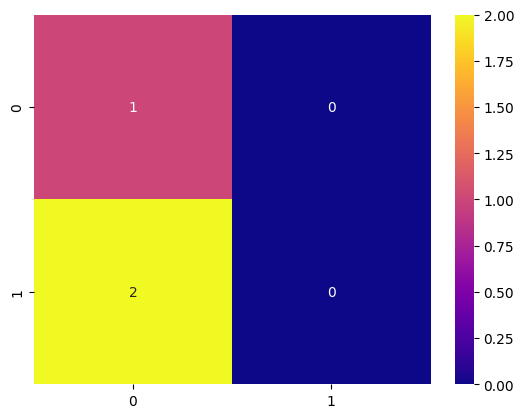

In [42]:
sns.heatmap(cm, cmap="plasma", annot=True)

### Count Vectorized

In [43]:
#Applying Naive Bayes
clf = MultinomialNB() 
clf.fit(count_train, Y_train)                       
pred1 = clf.predict(count_test)                    
score = metrics.accuracy_score(Y_test, pred1)
print("accuracy:   %0.3f" % score)
cm2 = metrics.confusion_matrix(Y_test, pred1)
print(cm2)

accuracy:   0.333
[[1 0]
 [2 0]]


In [44]:
print('Wrong predictions out of total')
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: ',100*accuracy_score(Y_test,pred1))

Wrong predictions out of total
2 / 3
Percentage accuracy:  33.33333333333333


In [45]:
## Plotting confusion matrix for Count vectorizer.

<Axes: >

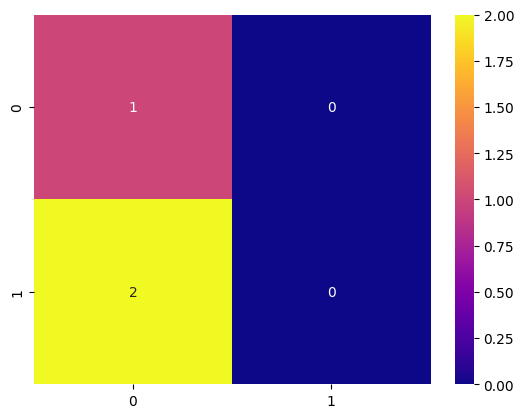

In [46]:
sns.heatmap(cm2, cmap="plasma", annot=True)

# 2. Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier

### TF-Idf Vectorized

In [48]:
RF=RandomForestClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds2 = RF.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.3333333333333333
--------------------------------------------------
confusion_matrix train is:  [[5 0]
 [0 2]]
confusion_matrix test is:  [[1 0]
 [2 0]]
Wrong predictions out of total
--------------------------------------------------
2 / 3
--------------------------------------------------


### Count Vectorized

In [49]:
RF=RandomForestClassifier().fit(count_train,Y_train)
#predict on train 
train_preds3 = RF.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = RF.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)



#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

Model accuracy on train is:  1.0
Model accuracy on test is:  0.3333333333333333
--------------------------------------------------
confusion_matrix train is:  [[5 0]
 [0 2]]
confusion_matrix test is:  [[1 0]
 [2 0]]
Wrong predictions out of total
--------------------------------------------------
2 / 3
--------------------------------------------------


# K-Nearest Neighbour

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)
#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

Model accuracy on train is:  0.7142857142857143
Model accuracy on test is:  0.3333333333333333
--------------------------------------------------


In [52]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))

print('-'*50)

confusion_matrix train is:  [[5 0]
 [2 0]]
confusion_matrix test is:  [[1 0]
 [2 0]]
Wrong predictions out of total
--------------------------------------------------
2 / 3
--------------------------------------------------


In [53]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

Model accuracy on train is:  0.7142857142857143
Model accuracy on test is:  0.3333333333333333
--------------------------------------------------


In [54]:
#Confusion matrix
print("confusion_matrix train is: ", metrics.confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", metrics.confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

confusion_matrix train is:  [[5 0]
 [2 0]]
confusion_matrix test is:  [[1 0]
 [2 0]]
Wrong predictions out of total
--------------------------------------------------
2 / 3
--------------------------------------------------
